In [1]:
import sys
!{sys.executable} -m pip install matplotlib

In [2]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
house = pd.read_csv('./' + 'house50.csv')

In [4]:
house.head(5) 

,Unnamed: 0,zpid,id,lotId,imgSrc,hasImage,statusType,statusText,detailUrl,latLong,...,pgapt,sgapt,zestimate,shouldShowZestimateAsPrice,hasVideo,isHomeRec,hasAdditionalAttributions,availabilityDate,streetViewMetadataURL,streetViewURL
0,0,37.805623--122.27508,37.805623--122.27508,1.001487e+09,https://photos.zillowstatic.com/fp/0a79a60e6ff...,True,FOR_RENT,Domain Oakland,/b/domain-oakland-oakland-ca-5XjVPv/,"{'latitude': 37.805623, 'longitude': -122.27508}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,37.828877--122.265456,37.828877--122.265456,2.329248e+09,https://photos.zillowstatic.com/fp/1ac29ea29ce...,True,FOR_RENT,MacArthur Commons,/b/macarthur-commons-oakland-ca-BG4Hxg/,"{'latitude': 37.828877, 'longitude': -122.265456}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,37.791842--122.420288,37.791842--122.420288,2.082886e+09,https://photos.zillowstatic.com/fp/5f52a52b7d2...,True,FOR_RENT,For Rent,/b/1656-sacramento-st-san-francisco-ca-9NKFjJ/,"{'latitude': 37.791842, 'longitude': -122.420288}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2067470365,2067470365,NaN,https://photos.zillowstatic.com/fp/89e4e4abc7f...,True,FOR_RENT,Apartment for rent,https://www.zillow.com/homedetails/1614-Willow...,"{'latitude': 37.770107, 'longitude': -122.2478}",...,ForRent,For Rent,NaN,False,False,False,False,NaN,NaN,NaN
4,4,2067470396,2067470396,NaN,https://photos.zillowstatic.com/fp/94617e1465b...,True,FOR_RENT,Apartment for rent,https://www.zillow.com/homedetails/270-Capitol...,"{'latitude': 37.712755, 'longitude': -122.458788}",...,ForRent,For Rent,NaN,False,False,False,False,NaN,NaN,NaN


In [5]:
#clean the data, drop useless columns
house1 = house[['unformattedPrice', 'address', 'addressStreet', 'addressCity', 'beds', 'baths', 'area', ]]
house1.head()

,unformattedPrice,address,addressStreet,addressCity,beds,baths,area
0,NaN,"1389 Jefferson St, Oakland, CA",1389 Jefferson St # C209,Oakland,NaN,NaN,NaN
1,NaN,"540 39th St, Oakland, CA",540 39th St # A2-307,Oakland,NaN,NaN,NaN
2,NaN,"1656 Sacramento St, San Francisco, CA",1656 Sacramento St # 4,San Francisco,NaN,NaN,NaN
3,2400.0,"1614 Willow St, Alameda, CA 94501",1614 Willow St,Alameda,1.0,1.0,NaN
4,3000.0,"270 Capitol Ave #3, San Francisco, CA 94112",270 Capitol Ave #3,San Francisco,2.0,2.0,900.0


In [6]:
#rename columns
house1.rename(columns={'unformattedPrice': 'Price'}, inplace=True)

In [7]:
#check if there are null 
house1.isnull().any()

Price             True
address          False
addressStreet    False
addressCity      False
beds              True
baths             True
area              True
dtype: bool

In [8]:
#sum null
pd.isnull(house1).sum()

Price            172
address            0
addressStreet      0
addressCity        0
beds             172
baths            175
area             404
dtype: int64

In [9]:
#clean null
house2 = house1.dropna(how='any', axis='rows')
house2.head()

,Price,address,addressStreet,addressCity,beds,baths,area
4,3000.0,"270 Capitol Ave #3, San Francisco, CA 94112",270 Capitol Ave #3,San Francisco,2.0,2.0,900.0
5,2300.0,"42 Grafton Ave #42, San Francisco, CA 94112",42 Grafton Ave #42,San Francisco,2.0,1.0,550.0
6,1950.0,"(undisclosed Address), Alameda, CA 94501",(undisclosed Address),Alameda,1.0,1.0,600.0
7,2595.0,"281 Juana Ave #204, San Leandro, CA 94577",281 Juana Ave #204,San Leandro,2.0,2.0,1200.0
8,2311.0,"1411 Alice St #KQGEKNY6U, Oakland, CA 94612",1411 Alice St #KQGEKNY6U,Oakland,1.0,1.0,604.0


In [10]:
#check if clean well
pd.isnull(house2).sum()

Price            0
address          0
addressStreet    0
addressCity      0
beds             0
baths            0
area             0
dtype: int64

In [11]:
#check index
house2.index

Int64Index([  4,   5,   6,   7,   8,  13,  14,  19,  20,  26,
            ...
            987, 988, 989, 990, 991, 992, 994, 995, 996, 999],
           dtype='int64', length=595)

In [12]:
#reset index
data = house2.reset_index(drop=True)

In [13]:
data.head()

,Price,address,addressStreet,addressCity,beds,baths,area
0,3000.0,"270 Capitol Ave #3, San Francisco, CA 94112",270 Capitol Ave #3,San Francisco,2.0,2.0,900.0
1,2300.0,"42 Grafton Ave #42, San Francisco, CA 94112",42 Grafton Ave #42,San Francisco,2.0,1.0,550.0
2,1950.0,"(undisclosed Address), Alameda, CA 94501",(undisclosed Address),Alameda,1.0,1.0,600.0
3,2595.0,"281 Juana Ave #204, San Leandro, CA 94577",281 Juana Ave #204,San Leandro,2.0,2.0,1200.0
4,2311.0,"1411 Alice St #KQGEKNY6U, Oakland, CA 94612",1411 Alice St #KQGEKNY6U,Oakland,1.0,1.0,604.0


In [14]:
data.tail()

,Price,address,addressStreet,addressCity,beds,baths,area
590,3000.0,"475 Arlington St #ROANOKE, San Francisco, CA 9...",475 Arlington St #ROANOKE,San Francisco,2.0,1.0,1050.0
591,2650.0,"132 Clinton Park APT 3, San Francisco, CA 94103",132 Clinton Park APT 3,San Francisco,2.0,1.0,750.0
592,2745.0,"369 Staples Ave, San Francisco, CA 94112",369 Staples Ave,San Francisco,2.0,1.0,550.0
593,2350.0,"2848 23rd Ave, Oakland, CA 94606",2848 23rd Ave,Oakland,2.0,1.0,1040.0
594,2480.0,"601 Van Ness Ave, San Francisco, CA 94102",601 Van Ness Ave,San Francisco,1.0,1.0,694.0


In [15]:
#following steps to know the structure of data
data.size

4165

In [16]:
data.shape 

(595, 7)

In [17]:
data.columns

Index(['Price', 'address', 'addressStreet', 'addressCity', 'beds', 'baths',
       'area'],
      dtype='object')

In [18]:
data.dtypes

Price            float64
address           object
addressStreet     object
addressCity       object
beds             float64
baths            float64
area             float64
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          595 non-null    float64
 1   address        595 non-null    object 
 2   addressStreet  595 non-null    object 
 3   addressCity    595 non-null    object 
 4   beds           595 non-null    float64
 5   baths          595 non-null    float64
 6   area           595 non-null    float64
dtypes: float64(4), object(3)
memory usage: 32.7+ KB


In [20]:
price_per_area = data["Price"]/data["area"]
data.insert(7, 'Price Per Area', price_per_area)
data

,Price,address,addressStreet,addressCity,beds,baths,area,Price Per Area
0,3000.0,"270 Capitol Ave #3, San Francisco, CA 94112",270 Capitol Ave #3,San Francisco,2.0,2.0,900.0,3.333333
1,2300.0,"42 Grafton Ave #42, San Francisco, CA 94112",42 Grafton Ave #42,San Francisco,2.0,1.0,550.0,4.181818
2,1950.0,"(undisclosed Address), Alameda, CA 94501",(undisclosed Address),Alameda,1.0,1.0,600.0,3.250000
3,2595.0,"281 Juana Ave #204, San Leandro, CA 94577",281 Juana Ave #204,San Leandro,2.0,2.0,1200.0,2.162500
4,2311.0,"1411 Alice St #KQGEKNY6U, Oakland, CA 94612",1411 Alice St #KQGEKNY6U,Oakland,1.0,1.0,604.0,3.826159
...,...,...,...,...,...,...,...,...
590,3000.0,"475 Arlington St #ROANOKE, San Francisco, CA 9...",475 Arlington St #ROANOKE,San Francisco,2.0,1.0,1050.0,2.857143
591,2650.0,"132 Clinton Park APT 3, San Francisco, CA 94103",132 Clinton Park APT 3,San Francisco,2.0,1.0,750.0,3.533333
592,2745.0,"369 Staples Ave, San Francisco, CA 94112",369 Staples Ave,San Francisco,2.0,1.0,550.0,4.990909
593,2350.0,"2848 23rd Ave, Oakland, CA 94606",2848 23rd Ave,Oakland,2.0,1.0,1040.0,2.259615


In [21]:
data.describe() 

,Price,beds,baths,area,Price Per Area
count,595.000000,595.000000,595.000000,595.000000,595.000000
mean,2443.336134,1.531092,1.174790,896.726050,3.303943
std,407.826779,0.930384,1.187634,978.224006,1.106335
min,1000.000000,1.000000,0.000000,110.000000,0.116009
25%,2165.000000,1.000000,1.000000,638.500000,2.641499
50%,2495.000000,1.000000,1.000000,750.000000,3.158333
75%,2800.000000,2.000000,1.000000,900.000000,3.916667
max,3000.000000,18.000000,18.000000,16809.000000,11.363636


In [22]:
data.groupby("addressCity").mean()

,Price,beds,baths,area,Price Per Area
addressCity,,,,,
Alameda,2408.260870,1.565217,1.000000,1009.260870,2.877710
Berkeley,2297.500000,2.000000,1.000000,775.000000,2.971875
Daly City,2545.833333,1.666667,1.166667,800.500000,3.528354
Emeryville,2383.111111,1.444444,1.037037,775.592593,3.191712
Oakland,2321.632184,1.773946,1.235632,1008.249042,2.838061
San Francisco,2587.650190,1.296578,1.039924,760.642586,3.853960
San Leandro,2129.461538,1.384615,3.307692,1526.384615,2.464869


In [23]:
pd.options.display.float_format = '{:,.2f}'.format
mean_data = data.groupby("addressCity").mean()
mean_data

,Price,beds,baths,area,Price Per Area
addressCity,,,,,
Alameda,"2,408.26",1.57,1.00,"1,009.26",2.88
Berkeley,"2,297.50",2.00,1.00,775.00,2.97
Daly City,"2,545.83",1.67,1.17,800.50,3.53
Emeryville,"2,383.11",1.44,1.04,775.59,3.19
Oakland,"2,321.63",1.77,1.24,"1,008.25",2.84
San Francisco,"2,587.65",1.30,1.04,760.64,3.85
San Leandro,"2,129.46",1.38,3.31,"1,526.38",2.46


[Text(0.5, 0, 'area'), Text(0.5, 1.0, 'Mean Area per City')]

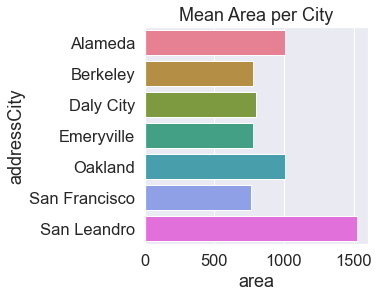

In [24]:
#create the bar plot to see the changes of all the countries
sns.set(font_scale=1.5) 
fig, axes = plt.subplots(1,1, figsize=(4, 4))
#set the color 
color = sns.color_palette('husl', len(mean_data.index))
sns.barplot(mean_data['area'], mean_data.index, palette = color,ax=axes)
axes.set(xlabel='area', title='Mean Area per City')

[Text(0.5, 0, 'mean price'), Text(0.5, 1.0, 'Mean Price per City')]

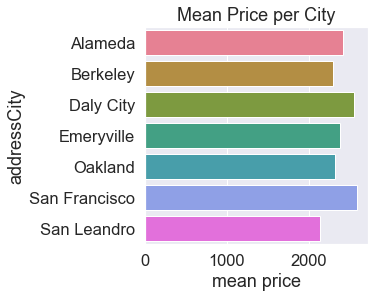

In [25]:
sns.set(font_scale=1.5) 
fig, axes = plt.subplots(1,1, figsize=(4, 4))
color = sns.color_palette('husl', len(mean_data.index))
sns.barplot(mean_data['Price'], mean_data.index, palette = color,ax=axes)
axes.set(xlabel='mean price', title='Mean Price per City')

[Text(0.5, 0, 'Price Per Area'), Text(0.5, 1.0, 'Price Per Area')]

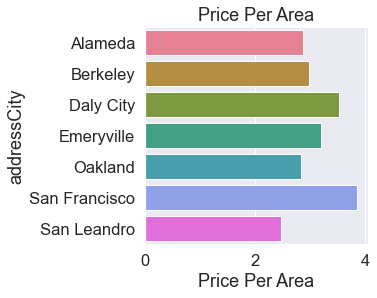

In [26]:
sns.set(font_scale=1.5) 
fig, axes = plt.subplots(1,1, figsize=(4, 4))
color = sns.color_palette('husl', len(mean_data.index))
sns.barplot(mean_data['Price Per Area'], mean_data.index, palette = color,ax=axes)
axes.set(xlabel='Price Per Area', title='Price Per Area')

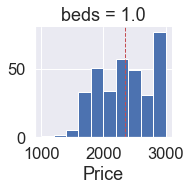

In [27]:
data1=data[data['beds'].isin([1])]
Price1 = data1['Price']
g = sns.FacetGrid(data1, col='beds')
g = g.map(plt.hist, 'Price')
plt.axvline(Price1.mean(), color='r', linestyle='--', linewidth=1)

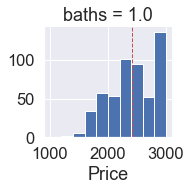

In [28]:
data2=data[data['baths'].isin([1])]
Price2 = data2['Price']
g = sns.FacetGrid(data2, col='baths')
g = g.map(plt.hist, 'Price')
plt.axvline(Price2.mean(), color='r', linestyle='--', linewidth=1)

In [29]:
data.groupby("addressCity").count()

,Price,address,addressStreet,beds,baths,area,Price Per Area
addressCity,,,,,,,
Alameda,23,23,23,23,23,23,23
Berkeley,2,2,2,2,2,2,2
Daly City,6,6,6,6,6,6,6
Emeryville,27,27,27,27,27,27,27
Oakland,261,261,261,261,261,261,261
San Francisco,263,263,263,263,263,263,263
San Leandro,13,13,13,13,13,13,13


In [30]:
san = data[data["addressCity"] == "San Francisco"]
oak = data[data["addressCity"] == "Oakland"]

In [31]:
oaksan = [oak, san]
oak_san = pd.concat(oaksan)
oak_san

,Price,address,addressStreet,addressCity,beds,baths,area,Price Per Area
4,"2,311.00","1411 Alice St #KQGEKNY6U, Oakland, CA 94612",1411 Alice St #KQGEKNY6U,Oakland,1.00,1.00,604.00,3.83
7,"2,550.00","1218 Excelsior Ave APT 1, Oakland, CA 94610",1218 Excelsior Ave APT 1,Oakland,2.00,1.00,700.00,3.64
11,"1,455.00","1722 27th Ave UNIT 37, Oakland, CA 94601",1722 27th Ave UNIT 37,Oakland,1.00,1.00,525.00,2.77
13,"1,650.00","2225 7th Ave APT 39, Oakland, CA 94606",2225 7th Ave APT 39,Oakland,1.00,1.00,660.00,2.50
14,"1,900.00","555 Jean St APT 428, Oakland, CA 94610",555 Jean St APT 428,Oakland,1.00,1.00,622.00,3.05
...,...,...,...,...,...,...,...,...
587,"2,295.00","955 Pine St APT 44, San Francisco, CA 94108",955 Pine St APT 44,San Francisco,1.00,1.00,800.00,2.87
590,"3,000.00","475 Arlington St #ROANOKE, San Francisco, CA 9...",475 Arlington St #ROANOKE,San Francisco,2.00,1.00,"1,050.00",2.86
591,"2,650.00","132 Clinton Park APT 3, San Francisco, CA 94103",132 Clinton Park APT 3,San Francisco,2.00,1.00,750.00,3.53
592,"2,745.00","369 Staples Ave, San Francisco, CA 94112",369 Staples Ave,San Francisco,2.00,1.00,550.00,4.99


In [32]:
cities = ['Oakland', 'San Francisco']

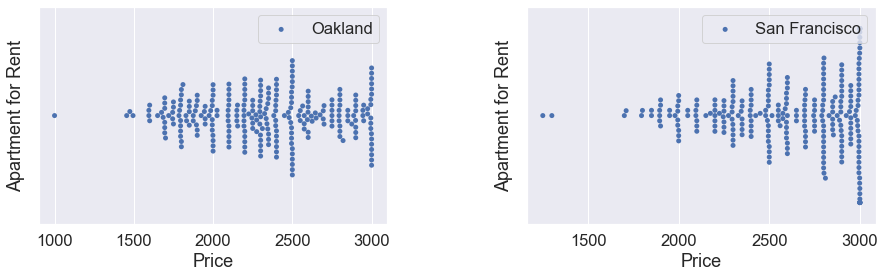

In [33]:
fig = plt.figure(figsize=(15,10)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)#spaces between plots
n = 1
for city in cities:
    ax = fig.add_subplot(len(cities),2,n) 
    info = oak_san[oak_san["addressCity"] == city]["Price"]
    sns.swarmplot(info)
    plt.xlabel('Price')
    plt.ylabel('Apartment for Rent')
    ax.legend([city],loc = 'upper right') #title of the single plot
    n = n+1

plt.show()

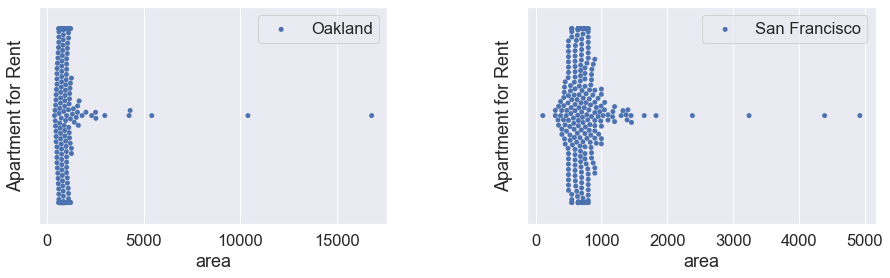

In [34]:
fig = plt.figure(figsize=(15,10)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)#spaces between plots
n = 1
for city in cities:
    ax = fig.add_subplot(len(cities),2,n) 
    info = oak_san[oak_san["addressCity"] == city]["area"]
    sns.swarmplot(info)
    plt.xlabel('area')
    plt.ylabel('Apartment for Rent')
    ax.legend([city],loc = 'upper right') #title of the single plot
    n = n+1

plt.show()

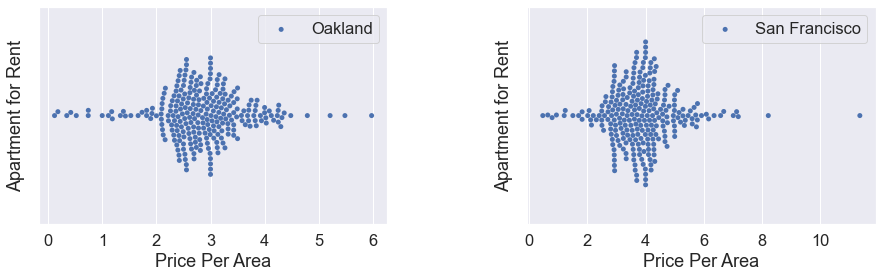

In [35]:
fig = plt.figure(figsize=(15,10)) 
fig.subplots_adjust(hspace=0.5, wspace = 0.4)#spaces between plots
n = 1
for city in cities:
    ax = fig.add_subplot(len(cities),2,n) 
    info = oak_san[oak_san["addressCity"] == city]["Price Per Area"]
    sns.swarmplot(info)
    plt.xlabel('Price Per Area')
    plt.ylabel('Apartment for Rent')
    ax.legend([city],loc = 'upper right') #title of the single plot
    n = n+1

plt.show()